<a href="https://colab.research.google.com/github/k4west/huggingface/blob/main/week5_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transformer 모델과 🤗Transformers 소개  
##🤗로 시작하는 AI 스터디 Week 5
##학습범위: 텍스트 분류 Chapter 2

발표자: 박현상

*발표자료와 실습자료를 이 문서로 통합



목차  

1. 데이터셋   
1-1. 허깅페이스 데이터셋 사용  
1-2. 데이터셋에서 데이터프레임화  
1-3. 클래스 분포 확인  
1-4. 트윗 길이 확인

2. 텍스트에서 토큰화  
2-1. 문자 토큰화  
2-2. 단어 토큰화  
2-3. 부분단어 토큰화  
2-4. 전체 데이터셋 토큰화

3. 텍스트 분류 모델 훈련  
3-1. 트랜스포머를 특성 추출기로 사용  
3-2. 트랜스포머 미세 튜닝




텍스트 분류는 NLP에서 매우 일반적인 작업입니다.  
DistilBERT는 자연어 처리(NLP) 분야에서 사용되는 딥 러닝 모델 중 하나로, BERT (Bidirectional Encoder Representations from Transformers) 모델을 축소한 형태입니다.   
대규모 BERT모델을 훈련해야 한다면, 간단히 사전 훈련된 모델의 체크포인트(checkpoint)를 바꾸면 됩니다.  

*체크포인트 - 모델의 가중치와 중요한 학습 상태를 저장,나중에 모델을 재학습하거나 사용할 때 불러와서 활용

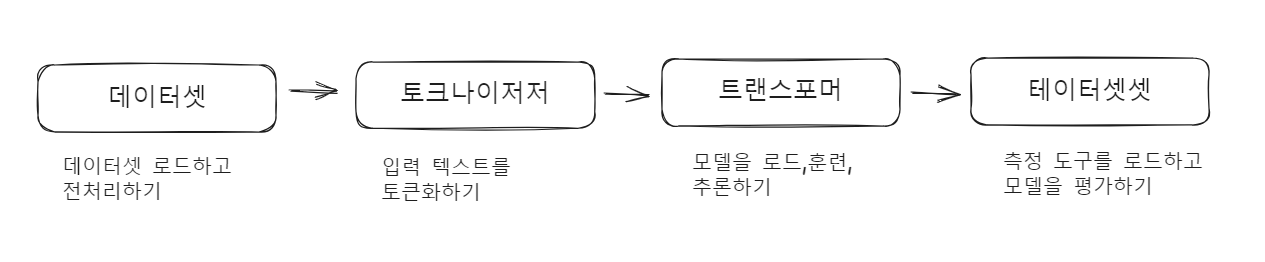

## 1.  데이터셋

분노(anger), 혐오(digsgust), 두려움(fear), 기쁨(joy), 슬픔(sadness), 놀람(suprise)의 여섯 개의 감정으로 나눈 데이터셋을 사용하겠습니다.

### 1-1. 허깅페이스 데이터셋 사용


In [1]:
# 데이터셋 라이브러리 설치
!pip install datasets



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 11.8 MB/s eta 0:00:00


In [2]:
# 허깅페이스 허브(https://oreil.ly/959YT) 데이터 다운로드
from datasets import list_datasets
all_datasets = list_datasets()
print(f"현재 허브에는 {len(all_datasets)}개의 데이터셋이 있습니다.")
print(f"처음 10개 데이터셋 : {(all_datasets)[:10]}개의 데이터셋이 있습니다.")

<ipython-input-2-a444d4b29aff>:3: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


현재 허브에는 60128개의 데이터셋이 있습니다.
처음 10개 데이터셋 : ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']개의 데이터셋이 있습니다.


In [3]:
# 데이터셋마다 이름이 있습니다. emotion 데이터셋을 로드
from datasets import load_dataset
emotions = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
print(emotions)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [ ]:
train_ds = emotions["train"]
train_ds
print(train_ds)

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})


In [ ]:
print(len(train_ds))
print(train_ds[0])
# 아파치 애로우의 열기반 포맷을 사용

16000
{'text': 'i didnt feel humiliated', 'label': 0}


In [ ]:
print(train_ds.column_names)

['text', 'label']


###아파치 애로우(Apache Arrow)
####효율적인 데이터 표현 :   
컬럼평 데이터 구조 / 읽기 및 쓰기 작업 빠르게 수행, 데이터 압축 및 직렬화 최적화   

####다양한 프로그래밍 언어 지원 :  
 c++,Python,Java,Go,Rust,Ruby,JavaScript
교차 언어 및 시스템 호환성 : 아파치 애로우는 서로 다은 언어 및 시스템 간에 데이터를 손쉽게 공유  

####데이터 전송 최적화 :   
데이터를 메모리에서 직렬화하거나, 역직렬화하는데 드는 비용을 최소화   

####분산 시스템 지원 :   
분산시스템과 통합할 수 있도록 설계, 대규모 데이터 처리 플랫폼과 연계가능

In [ ]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [ ]:
print(train_ds["text"][:5])
print(train_ds["label"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']
[0, 0, 3, 2, 3]


### 포맷에 따른 데이터셋 로딩방법
## 데이터 포맷   //     로딩스크립트    //    예시
CSV // csv // load_dataser("csv", data_files="my_file.csv")  
텍스트 // txt // load_dataser("text", data_files="my_file.txt")  
JSON // JSON // load_dataser("json", data_files="my_file.jsonl")



In [ ]:
# 웹을 통한 데이터셋 다운로드
# dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt" # 없어졌어요
# !wget {dataset_url}
# i head -n 1 train.txt
# emotions_local = load_dataset("csv", data_files="train.txt", sep=";", names = ["text", "label"])
# dataset_url ="https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt.txt?dl=1"
# emotions_remote = load_dataset("csv", data_files=dataset_url, sep=";", names = ["text", "label"])

# https://huggingface.co/datasets/dair-ai/emotion 현재는 이사이트 참조하시면됩니다.
from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion") # 현재는 dataset에서 바로 호출할 수 있습니다.

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
print(dataset["train"][0])

{'text': 'i didnt feel humiliated', 'label': 0}


### 1-2. 데이터셋에서 데이터프레임화

In [ ]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head

<bound method NDFrame.head of                                                     text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minute to post i feel greedy wrong      3
3      i am ever feeling nostalgic about the fireplac...      2
4                                   i am feeling grouchy      3
...                                                  ...    ...
15995  i just had a very brief time in the beanbag an...      0
15996  i am now turning and i feel pathetic that i am...      0
15997                     i feel strong and good overall      1
15998  i feel like this was such a rude comment and i...      3
15999  i know a lot but i feel so stupid because i ca...      0

[16000 rows x 2 columns]>

In [ ]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


### 1-3. 클래스 분포 확인

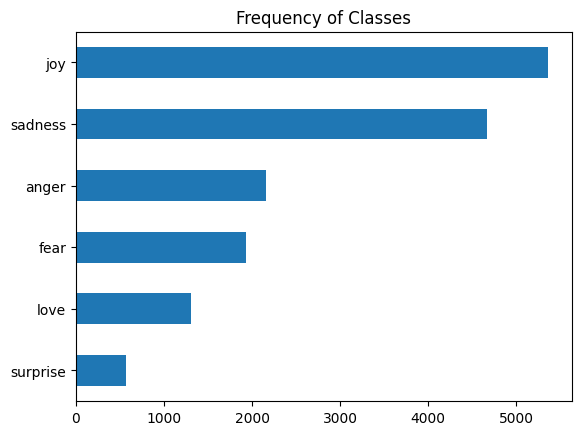

In [ ]:
import matplotlib.pyplot as plt
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()
# 훈련/테스트 분할을 만들기 전에는 샘플링 전략을 사용하지말기. / 일반적으로 훈련세트에만 샘플링 전략을 사용

### 1-4. 트윗 길이 확인

트랜스포머 모델은 최대 문맥 크기(maximum context size)라는 최대 입력 시퀸스 길이가 있습니다.   
DistilBERT를 사용하는 애플리케이션에서 최대 문맥 크기는 512토큰으로 문단 몇 개 정도가 됩니다.  
토큰은 텍스트의 기본 단위입니다.

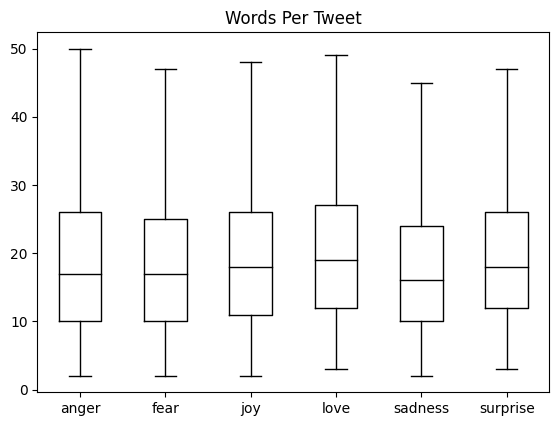

In [ ]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
# 출력 포맷 초기화(DataFrame 포맷이 더이상 필요 없어서 초기화합니다.)
emotions.reset_format()

## 2. 텍스트에서 토큰화

### 2-1. 문자 토큰화

In [ ]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [ ]:
# 고유한 정수로 인코딩
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [ ]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


텍스트의 구조를 무시하고, 전체 문자열을 문자 스트림으로 처리합니다.   
철자 오류나 희귀한 단어를 처리하는데 유용하지만, 단어 같은 언어 구조를 이 데이터에서 학습해야 한다는 단점이 있습니다.  
이러한 이유로 문자 수준의 토큰화는 거의 사용하지 않습니다.

In [ ]:
categorical_df = pd.DataFrame({
    "Name" : ["Bumlebee", "Optimus Prime", "Megatron"],
    "label ID": [0, 1, 2]
})
print(categorical_df)

            Name  label ID
0       Bumlebee         0
1  Optimus Prime         1
2       Megatron         2


In [ ]:
# 판다스 데이터 프레임으로 묶으면 자동으로 순서가 생겨서 문제가 발생합니다.
# get_dummies 함수로 원-핫 벡터화합니다.
Dm_categorical_df = pd.get_dummies(categorical_df["Name"])
print(Dm_categorical_df)

   Bumlebee  Megatron  Optimus Prime
0         1         0              0
1         0         0              1
2         0         1              0


In [ ]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
print(one_hot_encodings.shape)

torch.Size([38, 20])


38개의 입력 토큰 각각에 20차원의 원-핫 벡터가 만들어졌습니다. 고유한 문자가 20개이기 때문입니다.  
ex)  
["사과", "바나나", "체리", "딸기", "포도","포도","포도","포도"]  
"사과"에 대한 원-핫 인코딩: [1, 0, 0, 0, 0]  
"바나나"에 대한 원-핫 인코딩: [0, 1, 0, 0, 0]  
"체리"에 대한 원-핫 인코딩: [0, 0, 1, 0, 0]  
"딸기"에 대한 원-핫 인코딩: [0, 0, 0, 1, 0]  
"포도"에 대한 원-핫 인코딩: [0, 0, 0, 0, 1]  
torch.size([8,5])



In [ ]:
print(f"토큰 : {tokenized_text[0]}")
print(f"텐서 인덱스 : {input_ids[0]}")
print(f"원-핫 인코딩 : {one_hot_encodings[0]}")


토큰 : T
텐서 인덱스 : 5
원-핫 인코딩 : tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### 2-2. 단어 토큰화

In [ ]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


각 단어를 하나의 ID에 매핑합니다. 하지만 이 방식에는 겉으로 드러나지 않은 문제가 하나 있습니다.   
단어에 곡용, 활용형, 철자 오류가 포함되어 어휘사전이 금세 수백만 개 까지 늘어날 수 있다.  

** 곡용 - 교착어인 한국어와 달리 굴절어에서 문법 기능에 따라 단어 형태가 변하는 것을 곡용이라고 합니다

어휘사전이 크면 신경망의 파라미터 역시 많이 필요해져 문제가 됩니다. 이를 설명하기 위해 100만 개의 고유한 단어가 있고, 이 100만 차원의 입력 벡터를 신경망의 첫 번째 층에서 1,000차원의 벡터로 압축한다고 가정합니다.  
이 절차는 대부분의 NLP 구조에서 기본입니다. 결과적으로 첫 번째 층의 가중치 행렬은 100만개 x 1,000개 = 10억 개의 가중치를 가집니다. 이는 총 15억 개의 파라미터를 가진 가장 큰 GPT-2 모델과 비슷한 수준입니다.

모델 파라미터가 낭비되는 것은 피하는게 상책입니다. 가령 말뭉치에서 자주 등장하는 10만 개 단어만 사용합니다. 어휘 사전에 없는 단어는 'unknown'으로 분류해 UNK토큰으로 매핑합니다. 그러면 단어 토큰화 과정에서 중요한 정보를 일부 잃게 됩니다. 모델이 UNK에 매핑된 단어에서 어떤 정보도 얻지 못하기 때문입니다.

### 2-3. 부분단어 토큰화

NLP 분야에서 널시 사용되는 부분단어 토큰화 중   
BERT와 DistilBERT의 토크나이저로 사용되는 WordPiece로 시작합니다.

In [ ]:
! pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.0 MB/s eta 0:00:00


In [ ]:
#트랜스포머스는 사전훈련된 모델에 연관된 토크나이저를 빠르게 로드하는 클래스입니다.
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [ ]:
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [ ]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


[PAD] (Padding Token):

[PAD] 토큰은 패딩에 사용됩니다. 일반적으로 시퀀스의 길이를 맞추기 위해 사용되며, 모든 시퀀스가 동일한 길이를 가져야 할 때 사용됩니다.
예를 들어, 시퀀스의 길이가 다른 문장들을 처리할 때, 가장 긴 문장의 길이에 맞추기 위해 나머지 문장들을 [PAD] 토큰으로 패딩합니다.  
[UNK] (Unknown Token):

[UNK] 토큰은 모델이 학습한 어휘 사전에 없는 단어 또는 토큰을 나타냅니다.
모델이 모르는 단어가 나타날 때, [UNK]로 대체되어 처리됩니다.
  
[CLS] (Classification Token):  

[CLS] 토큰은 문장의 시작 부분에 추가되며, 주로 분류(classification) 작업에서 사용됩니다.
문장의 의미를 요약하거나, 문장 분류 작업의 입력으로 활용됩니다.  

[SEP] (Separation Token):  

[SEP] 토큰은 두 개의 문장을 구분하기 위해 사용됩니다. 주로 문장 쌍을 처리하는 모델에서 활용됩니다.
예를 들어, 자연어 이해(NLU) 작업에서 질문과 답변을 [SEP] 토큰으로 구분합니다.  
[MASK] (Mask Token):  

[MASK] 토큰은 마스킹(masking) 작업에서 사용됩니다.
모델의 입력 중 일부 토큰을 가려서(mask) 토큰 예측 작업에 활용됩니다. 주로 BERT와 같은 언어 모델에서 사용됩니다.

In [ ]:
# 토큰화된 문자를 다시 문자열로 복원
print(tokenizer.convert_tokens_to_string(tokens))
# text = "Tokenizing text is a core task of NLP." 원본 문자열

[CLS] tokenizing text is a core task of nlp. [SEP]


In [ ]:
# 어휘사전크기
tokenizer.vocab_size

30522

In [ ]:
# 최대 문맥 크기
tokenizer.model_max_length

512

In [ ]:
# 정방향 패스(forward pass) -> 입력에서 출력 방향으로 데이터가 흐르는 과정
tokenizer.model_input_names
#input_ids는 원본 텍스트를 모델이 이해할 수 있는 숫자 형태로 변환하는 역할을 하며,
# attention_mask는 어떤 토큰이 모델의 주의를 받아야 하는지를 제어합니다.

['input_ids', 'attention_mask']

사전 훈련된 모델을 사용할 때, 모델 훈련에 사용한 것과 동일한 토크나이저를 사요하는 것이 중요합니다. 토크나이저를 바꾸는 것은 어휘사전을 뒤섞는 것이나 다름없습니다.

### 2-4. 전체 데이터셋 토큰화하기

In [ ]:
def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)
  # 샘플 크기에 맞춰 샘플을 0으로 패딩
  # 모델의 최대 문맥 크기에 맞춰 샘플을 잘라냅니다.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ["안녕하세요, 어떻게 지내세요?", "오늘 날씨는 어떤가요?", "네, 좋아요!"]

# 토크나이저 생성
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(sentences)

# 텍스트를 시퀀스로 변환
sequences = tokenizer1.texts_to_sequences(sentences)

# 모든 시퀀스를 가장 긴 시퀀스에 맞춰 패딩
padded_sequences = pad_sequences(sequences, padding='post')

print("Padding=True 결과:")
print(padded_sequences)


Padding=True 결과:
[[1 2 3]
 [4 5 6]
 [7 8 0]]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 토크나이저 생성
tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(sentences)

# 텍스트를 시퀀스로 변환
sequences = tokenizer2.texts_to_sequences(sentences)

print("Padding=False 결과:")
print(sequences)


Padding=False 결과:
[[1, 2, 3], [4, 5, 6], [7, 8]]


In [ ]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
import numpy as np
# 원본 시퀀스와 패딩된 시퀀스
original_sequence1 = ["안녕하세요, 어떻게 지내세요?", "오늘 날씨는 어떤가요?", "네, 좋아요!"]
padded_sequence1 = ["패딩", "패딩", "패딩"]

# 어텐션 마스크 초기화 (전체를 1로 초기화)
attention_mask1 = np.ones(len(original_sequence1) + len(padded_sequence1), dtype=int)

# 패딩된 부분에 대한 어텐션 마스크 값 변경 (패딩 부분은 0으로 설정)
attention_mask1[len(original_sequence1):] = 0

print("원본 시퀀스:", original_sequence1)
print("패딩된 시퀀스:", padded_sequence1)
print("어텐션 마스크:", attention_mask1)


원본 시퀀스: ['안녕하세요, 어떻게 지내세요?', '오늘 날씨는 어떤가요?', '네, 좋아요!']
패딩된 시퀀스: ['패딩', '패딩', '패딩']
어텐션 마스크: [1 1 1 0 0 0]


In [ ]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size =None)
# 모든 샘플에 개별적으로 작용, batch_size = None으로 설정 -> 자동으로 배치 크기가 조정되거나 데이터의 크기에 따라 결정됩니다.

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
print(emotions_encoded['train'].column_names)

['text', 'label', 'input_ids', 'attention_mask']


데이터 콜레이터(Data Collator)는 주로 자연어 처리(Natural Language Processing, NLP) 작업에서 사용되는 개념입니다.   
데이터를 배치(batch)로 구성할 때 데이터의 정리, 패딩, 마스킹 등의 전처리 작업을 수행하는 역할을 합니다. 데이터 콜레이터는 모델 학습을 위해 입력 데이터와 레이블을 처리하고 배치(batch)로 묶어주는 중요한 구성 요소 중 하나입니다.

## 3. 텍스트 분류 모델 훈련

DistilBERT 같은 모델은 텍스트 시퀀스에 있는 마스킹된 단어를 예측하도록 사전훈련됩니다.   
하지만, 이런 언어 모델을 바로 텍스트 분류에 사용하지는 못합니다.

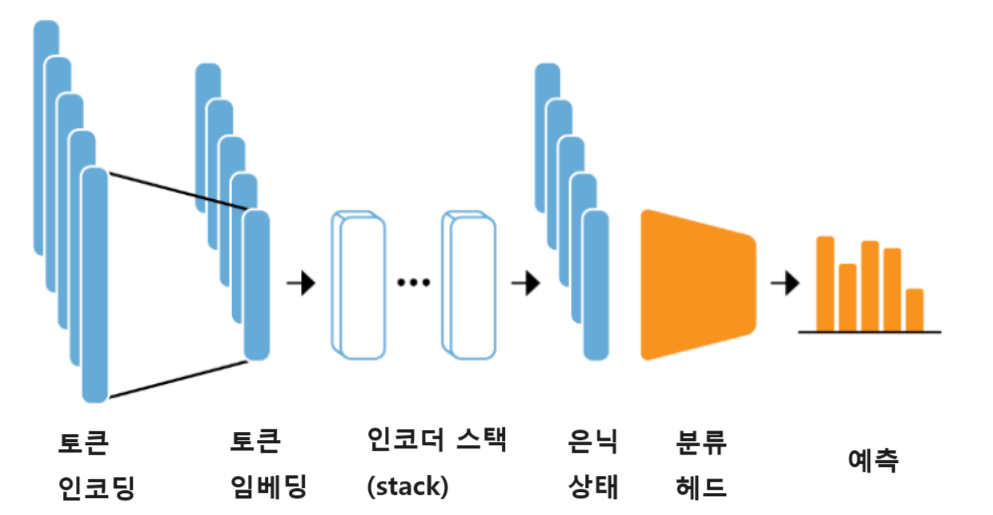

토큰 인코딩 : 원-핫 벡터로 나타냅니다. / 어휘사전의 크기가 결정된다.  
토큰 임베딩 : 저차원 공간의 벡터로 변환  
은닉 상태 : 모델이 데이터를 처리하는 동안 내부적으로 유지되는 중요한 정보입니다.  
분류 헤드(Classification Head) :  딥러닝 모델에서 주로 분류 작업(Classification Task)을 수행하기 위해 사용되는 구성 요소입니다   
(이중, 다중 클래스, 다중 레이블, 시퀀스)  
**시퀀스 분류(Sequence Classification): 시퀀스 데이터에 대한 분류 작업으로, 주어진 시퀀스에 대한 레이블을 예측합니다. 예를 들어, 텍스트 감성 분석에서는 주어진 텍스트의 감정(긍정, 부정 등)을 분류하는 작업에 사용됩니다.

In [ ]:
import torch
import torch.nn as nn

# 간단한 RNN 모델 정의
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)

    def forward(self, x):
        # 초기 은닉 상태를 0으로 초기화
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, hn = self.rnn(x, h0)
        return out, hn

# 입력 데이터 정의 (시퀀스 길이: 5, 토큰 벡터 크기: 3)
input_data1 = torch.randn(1, 5, 3)  # (batch_size, sequence_length, input_size)

# 모델 생성
rnn_model = SimpleRNN(input_size=3, hidden_size=2)

# 모델 실행
output_sequence1, final_hidden_state = rnn_model(input_data1)

print("Output Sequence:")
print(output_sequence1)
print("Final Hidden State:")
print(final_hidden_state)


Output Sequence:
tensor([[[ 0.8939,  0.9527],
         [ 0.4762,  0.3412],
         [ 0.8955, -0.1861],
         [ 0.0291, -0.1468],
         [-0.0189,  0.6878]]], grad_fn=<TransposeBackward1>)
Final Hidden State:
tensor([[[-0.0189,  0.6878]]], grad_fn=<StackBackward0>)


문장 생성 예시:

입력 데이터: "오늘 날씨가 매우 [●●●●●●●●]입니다."

목표: "[●●●●●●●●]"를 채우고 문장을 완성하기

은닉 상태 활용: 모델은 입력 데이터를 처리하면서 은닉 상태를 계산합니다. 예를 들어, "오늘 날씨가 매우"를 처리하면 은닉 상태가 일부 업데이트됩니다.

새로운 단어 생성: 은닉 상태를 활용하여 "[●●●●●●●●]"를 예측하고 생성합니다. 모델은 현재 은닉 상태와 이전 예측된 단어를 사용하여 다음 단어를 선택합니다.

문장 완성: 위 단계를 반복하여 "[●●●●●●●●]"를 포함한 전체 문장을 생성합니다.

### 3-1. 트랜스포머를 특성 추출기 사용

트랜스포머는 특성 추출기로 사용하기 편합니다. 훈련하는 동안 바디의 가중치를 동결하고 은닉 상태를 분류 모델의 특성으로 사용합니다.  
GPU를 사용하지 못할 때 특히 편리합니다.

In [ ]:
# 토큰 인코딩을 인베딩으로 변환한 다음 인코더 스택에 통과시켜 은닉 상태를 반환합니다.
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda"if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [ ]:
## 프레임 워크 간의 상호 운영성
# 텐서플로에서 로드하기
from transformers import TFAutoModel
tf_model = TFAutoModel.from_pretrained(model_ckpt)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


"This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture":   
만약 PyTorch 모델이 다른 작업에서 훈련되었거나 다른 아키텍처를 사용했다면, 가중치 불일치가 예상대로 발생할 수 있습니다.  

"This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical":   
그러나 PyTorch 모델과 TensorFlow 2.0 모델이 정확하게 동일하다고 기대하는 경우에는 이러한 가중치 불일치가 예상되지 않습니다.

In [ ]:
## 프레임 워크 간의 상호 운영성
# 파이토치 가중치만 있어서, 텐서플로에서 로드하면 오류 발생합니다라고 교재에 적혀있지만, 현재는 가중치가 다 있는거 같습니다.
tf_xlmr =TFAutoModel.from_pretrained("xlm-roberta-base")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


In [ ]:
## 프레임 워크 간의 상호 운영성
# from_pt 자동으로 파이토치 가중치를 다운로드해 변환
tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


In [ ]:
# 파이토치 텐서로 변환
text = "this is a test"
inputs = tokenizer(text,return_tensors="pt")
print(f"입력 텐서 크기: {inputs['input_ids'].size()}")

입력 텐서 크기: torch.Size([1, 6])


텐서의 크기는 [batch_size, n_tokens]입니다

In [ ]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad(): # 모델의 가중치가 업데이트되지 않도록 합니다.
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)


In [ ]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

은닉 상태의 텐서의 크기는 [batch_size, n_tokens, hidden_dim]입니다.

In [ ]:
# 모든 토큰의 첫 번째 은닉 상태를 선택합니다.
outputs.last_hidden_state[:,0].size()
torch.Size([1,768])
# 마지막(hidden) 상태는 입력 시퀀스를 가장 잘 요약한 정보를 포함하고 있으므로 이를 추출하여 특성 벡터로 사용합니다.

torch.Size([1, 768])

In [ ]:
def extract_hidden_states(batch):
    # 모델 입력을 GPU로 옮깁니다.
    inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}

    # 마지막 은닉 상태를 추출합니다.
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state

    # [CLS] 토큰에 대한 벡터를 반환합니다.
    return {"Hidden_state": last_hidden_state[:, 0].cpu().numpy()}

In [ ]:
# 토치로 포맷변경
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"]) # batch_size=1000이 기본값

In [ ]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

In [ ]:
emotions_hidden["train"].column_names

In [ ]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["Hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["Hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape


768차원의 은닉 상태를 시각화하기는 어렵기 때문에 UMAP 알고리즘을 사용해서 2D로 투영합니다.  
UMAP 특성이 [0,1]범위에 놓일 때 잘 동작합니다.

In [ ]:
# !pip install umap-learn

In [ ]:
# from umap import UMAP
# from sklearn.preprocessing import MinMaxScaler


# # 특성 스케일을 [0,1] 범위로 조정합니다.
# X_scaled = MinMaxScaler().fit_transform(X_train)

# # UMAP 객체를 생성하고 훈련합니다.
# mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

# # 2D 임베딩의 데이터프레임을 만듭니다.
# df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
# df_emb["label"] = y_train
# df_emb.head()


In [ ]:
# fig, axes = plt.subplots(2, 3, figsize=(7, 5))
# axes = axes.flatten()
# cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
# labels = emotions["train"].features["label"].names

# for i, (label, cmap) in enumerate(zip(labels, cmaps)):
#     df_emb_sub = df_emb.query(f"label == {i}")
#     axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
#                     gridsize=20, linewidths=(0,))
#     axes[i].set_title(label)  # 오타 수정: labe -> label
#     axes[i].set_xticks([]), axes[i].set_yticks([])

# plt.tight_layout()
# plt.show()


저차원 공간으로 투영한 것입니다. 투영공간에서 분리할 수 있다면 원본 공간에서도 분리할 수 있습니다.

In [ ]:
# from sklearn.linear_model import LogisticRegression

# # 수렴을 보장하기 위해 "max_iter"를 증가시킵니다.
# lr_clf = LogisticRegression(max_iter=3000)
# lr_clf.fit(X_train, y_train)
# lr_clf.score(X_valid, y_valid)

DummyClassifier(가장 많이 등장하는 클래스로 설정한 경우) -> 정확도 35%  

DummyClassifier(균등 클래스로 설정한 경우) -> 정확도 16.5%


In [ ]:
# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# def plot_confusion_matrix(y_preds, y_true, labels):
#     cm = confusion_matrix(y_true, y_preds, normalize="true")
#     fig, ax = plt.subplots(figsize=(6, 6))
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
#     disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
#     plt.title("Normalized confusion matrix")
#     plt.show()

# y_preds = lr_clf.predict(X_valid)
# plot_confusion_matrix(y_preds, y_valid, labels)


### 3-1. 트랜스포머 미세 튜닝

엔트-투-엔드(전이 학습의 일부로 간주됨)  
*미세튜닝 조건  
1.은닉 상태를 고정된 특성으로 사용하지 않고 전체 모델을 훈련합니다.  
2.분류헤드는 미분 가능해야합니다.  
3.신경망으로 분류 작업을 수행합니다.   
*특징  
1.엔드 투 엔드 미세 튜닝의 첫 번째 단계는 일반적으로 이미 대규모 데이터셋에서   사전 훈련된 모델을 선택하는 것입니다.  
2.모델 아키텍처의 동결: 선택한 사전 훈련된 모델의 일부 또는 전체를 동결합니다.   
3.추가 레이어 추가: 특정 작업에 맞게 미세 튜닝할 레이어를 추가합니다.  
4.역 전파 및 추가 훈련: 추가한 레이어와 사전 훈련된 모델의 일부를 사용하여 작업에 맞게 모델을 다시 훈련합니다   
5.성능 평가 및 조정: 미세 튜닝된 모델을 평가하고 성능을 향상시키기 위해 하이퍼파라미터를 조정하거나 다른 테크닉을 시도합니다.   
6.배포 및 추론: 미세 튜닝된 모델이 원하는 성능에 도달하면 이를 배포하여 추론 또는 예측 작업에 사용할 수 있습니다.

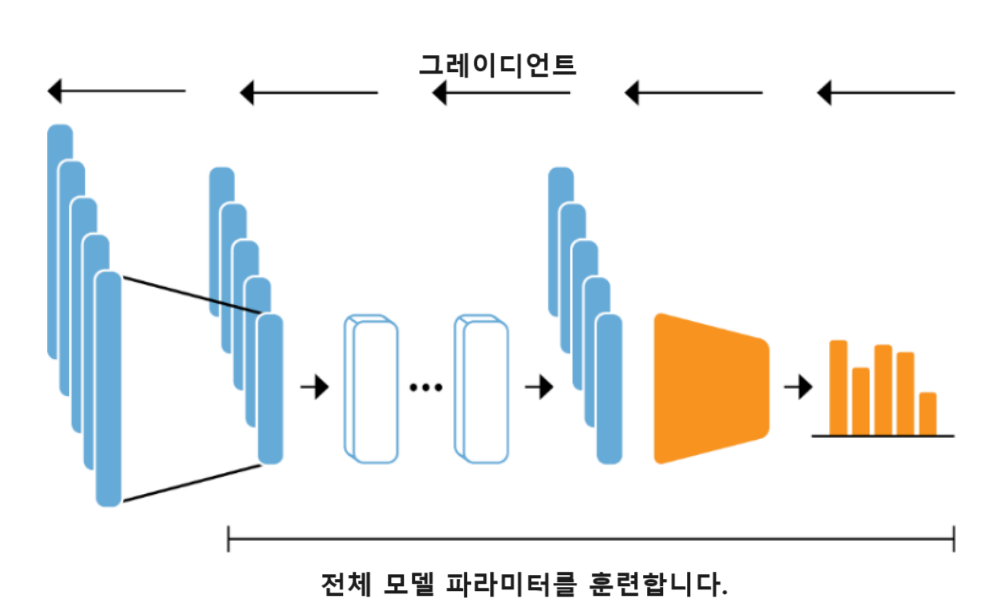

In [ ]:
# from transformers import AutoModelForSequenceClassification

# num_labels = 6
# model = (AutoModelForSequenceClassification
#          .from_pretrained(model_ckpt, num_labels= num_labels)
#          .to(device))
# ## 모델 일부가 랜덤하게 초기화 된다는 경고가 나옵니다. 분류헤드가 아직 훈련되지 않았기 때문에 정상입니다.

In [ ]:
# from sklearn.metrics import accuracy_score, f1_score

# def compute_metrics(pred):
#   labels = pred.label_ids
#   preds = pred.predictions.argmax(-1)
#   f1 = f1_score(labels,preds, average="weighted")
#   acc = accuracy_score(labels, preds)
#   return {"accuracy": acc, "f1":f1}

In [ ]:
# from huggingface_hub import notebook_login

# notebook_login()

In [ ]:
# from transformers import Trainer, TrainingArguments
# batch_size = 64
# logging_steps = len(emotions_encoded["train"]) // batch_size
# model_name = f"{model_ckpt}-finetuned-emotion"
# training_args = TrainingArguments(
#     output_dir=model_name,          # 모델 및 로그를 저장할 디렉토리
#     num_train_epochs=2,            # 훈련 에포크 횟수
#     per_device_train_batch_size=batch_size,  # 배치 크기
#     per_device_eval_batch_size=batch_size, # 배치크기
#     save_steps=500,                # 체크포인트 저장 주기
#     evaluation_strategy="epoch",   # 평가 주기 설정
#     logging_steps=logging_steps,    # 로깅 주기
#     save_total_limit=2,            # 체크포인트 저장 제한
#     learning_rate=2e-5,            # 학습률 설정
#     load_best_model_at_end=True,   # 최상의 모델을 마지막에 로드
#     metric_for_best_model="f1",    # 최상의 모델을 선택할 지표
#     greater_is_better=True ,        # 최상의 모델을 선택할 때 값이 클수록 좋을지 여부
#     log_level="error"               # 오류 메시지만 표시하고 경고나 정보 메시지는 표시하지 않습니다
# )

In [ ]:
# from transformers import Trainer

# trainer = Trainer(model=model, args=training_args,
#                   compute_metrics=compute_metrics,
#                   train_dataset=emotions_encoded["train"],
#                   eval_dataset=emotions_encoded["validation"])

In [ ]:
# preds_output = trainer.predict(emotions_encoded["validation"])

In [ ]:
# preds_output.metrics

In [ ]:
# y_preds = np.argmax(preds_output.predictions, axis=1)

In [ ]:
# plot_confusion_matrix(y_preds, y_valid, labels)